## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
import torch.optim as optim


from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'
print(device)

cpu


In [ ]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')

root_path = 'fmnist'
mkdir(root_path)

Directory fmnist is created!


In [ ]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path,
                                                        train=True,
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path,
                                                       train=False,
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

100%|██████████| 26421880/26421880 [00:01<00:00, 13605862.57it/s]


Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 230211.98it/s]


Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4245000.93it/s]


Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19629342.72it/s]

Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [ ]:
len(fmnist_dataset_train)

60000

Text(0.5, 1.0, 'Image label: 9')

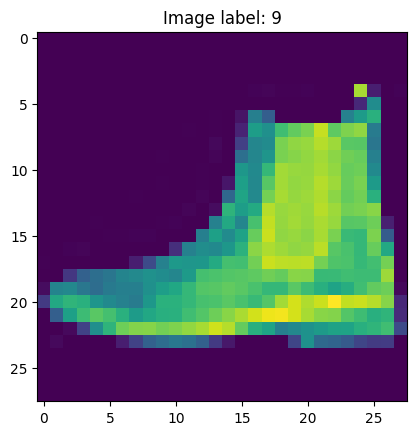

In [ ]:
random_batch = next(iter(train_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')

In [ ]:
for img, label in train_loader:
    img, label = img.to(device), label.to(device)
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [ ]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 500),
            nn.BatchNorm1d(500),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(500, 250),
            nn.BatchNorm1d(250),
            nn.GLU(),
            nn.Dropout(0.05),
            nn.Linear(125, num_classes),
            nn.ReLU()
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [ ]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 500]         392,500
       BatchNorm1d-3                  [-1, 500]           1,000
              ReLU-4                  [-1, 500]               0
           Dropout-5                  [-1, 500]               0
            Linear-6                  [-1, 250]         125,250
       BatchNorm1d-7                  [-1, 250]             500
               GLU-8                  [-1, 125]               0
           Dropout-9                  [-1, 125]               0
           Linear-10                   [-1, 10]           1,260
             ReLU-11                   [-1, 10]               0
Total params: 520,510
Trainable params: 520,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

Your experiments come here:

In [ ]:
# model = TinyNeuralNetwork().to(device)
# opt = optim.SGD(model.parameters(), lr=1e-3, momentum=0.97)
# loss_func = nn.CrossEntropyLoss()

# Your experiments, training and validation loops here

In [ ]:
def train(net, trainloader, criterion, optimizer, epochs=5, device='cpu', printing=True):
    data_len = len(trainloader)
    p_len = data_len // 5
    if (p_len == 0):
        p_len = 1
    for epoch in (range(epochs)):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            # print(inputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            # print(outputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print('ok')
            # print statistics
            if (printing):
                running_loss += loss.item()
                if i % p_len == p_len - 1:
                    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / p_len:.3f}')
                    running_loss = 0.0

    print('Finished Training')
def test(net, test_loader, device='cpu', printing=True):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            # calculate outputs by running images through the network
            outputs = net(inputs)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accur = correct / total
    if (printing):
        print(f'Accuracy of the network: {100 * correct / total} %')
    return accur

In [ ]:
model = TinyNeuralNetwork().to(device)
opt = optim.SGD(model.parameters(), lr=1e-2, momentum=0.8, nesterov=True)
loss_func = nn.CrossEntropyLoss()
train(model, train_loader, loss_func, opt, 15, device)

[1,    93] loss: 0.868
[1,   186] loss: 0.509
[1,   279] loss: 0.451
[1,   372] loss: 0.415
[1,   465] loss: 0.388
[2,    93] loss: 0.369
[2,   186] loss: 0.347
[2,   279] loss: 0.349
[2,   372] loss: 0.354
[2,   465] loss: 0.346
[3,    93] loss: 0.322
[3,   186] loss: 0.316
[3,   279] loss: 0.315
[3,   372] loss: 0.305
[3,   465] loss: 0.303
[4,    93] loss: 0.283
[4,   186] loss: 0.292
[4,   279] loss: 0.286
[4,   372] loss: 0.281
[4,   465] loss: 0.285
[5,    93] loss: 0.250
[5,   186] loss: 0.267
[5,   279] loss: 0.270
[5,   372] loss: 0.262
[5,   465] loss: 0.261
[6,    93] loss: 0.242
[6,   186] loss: 0.235
[6,   279] loss: 0.251
[6,   372] loss: 0.244
[6,   465] loss: 0.253
[7,    93] loss: 0.216
[7,   186] loss: 0.228
[7,   279] loss: 0.235
[7,   372] loss: 0.229
[7,   465] loss: 0.227
[8,    93] loss: 0.216
[8,   186] loss: 0.210
[8,   279] loss: 0.212
[8,   372] loss: 0.217
[8,   465] loss: 0.211
[9,    93] loss: 0.197
[9,   186] loss: 0.200
[9,   279] loss: 0.203
[9,   372] 

In [ ]:
test(model, test_loader, device)

Accuracy of the network: 88.78 %


0.8878

### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [ ]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, 512),
            nn.Linear(512, num_classes)

        )

    def forward(self, inp):
        return self.model(inp)

In [ ]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
            Linear-3                   [-1, 10]           5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.55
Estimated Total Size (MB): 1.57
----------------------------------------------------------------


In [ ]:
model_overfitt = OverfittingNeuralNetwork().to(device)
opt = optim.SGD(model_overfitt.parameters(), lr=1e-3, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

In [ ]:
from torch.utils.data import SubsetRandomSampler
train_indices = list(range(10000))
train_sampler = SubsetRandomSampler(train_indices)
train_overfitting_loader = torch.utils.data.DataLoader(fmnist_dataset_train,
                                                       batch_size=128,
                                                       sampler=train_sampler,
                                                       num_workers=2)

In [ ]:
train(model_overfitt, train_overfitting_loader, loss_func, opt, 20, device)


[1,    15] loss: 2.251
[1,    30] loss: 2.109
[1,    45] loss: 1.963
[1,    60] loss: 1.848
[1,    75] loss: 1.717
[2,    15] loss: 1.577
[2,    30] loss: 1.506
[2,    45] loss: 1.421
[2,    60] loss: 1.358
[2,    75] loss: 1.284
[3,    15] loss: 1.217
[3,    30] loss: 1.212
[3,    45] loss: 1.129
[3,    60] loss: 1.134
[3,    75] loss: 1.078
[4,    15] loss: 1.028
[4,    30] loss: 1.018
[4,    45] loss: 1.025
[4,    60] loss: 0.981
[4,    75] loss: 0.985
[5,    15] loss: 0.930
[5,    30] loss: 0.916
[5,    45] loss: 0.920
[5,    60] loss: 0.917
[5,    75] loss: 0.914
[6,    15] loss: 0.869
[6,    30] loss: 0.861
[6,    45] loss: 0.859
[6,    60] loss: 0.850
[6,    75] loss: 0.876
[7,    15] loss: 0.827
[7,    30] loss: 0.832
[7,    45] loss: 0.804
[7,    60] loss: 0.812
[7,    75] loss: 0.810
[8,    15] loss: 0.810
[8,    30] loss: 0.763
[8,    45] loss: 0.772
[8,    60] loss: 0.806
[8,    75] loss: 0.779
[9,    15] loss: 0.786
[9,    30] loss: 0.754
[9,    45] loss: 0.752
[9,    60] 

In [ ]:
test(model_overfitt, test_loader, device)

Accuracy of the network: 78.24 %


0.7824

In [ ]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1, layers=2, neurons=100):
        super(self.__class__, self).__init__()
        # neurons = 512
        self.flatten = nn.Flatten()
        self.linears = nn.ModuleList([nn.Linear(input_shape, layers*neurons)])
        for l in range(layers, 1, -1):
            self.linears.append(nn.Linear(l * neurons, (l - 1) * neurons))
        self.linears.append(nn.Linear(neurons, num_classes))
    def forward(self, inp):
        x = self.flatten(inp)
        for linear_layer in self.linears:
            x = linear_layer(x)
            x = torch.relu(x)
        x = self.output_layer(x)
        return x

In [ ]:
def train(net, trainloader, criterion, optimizer, epochs=5, device='cpu', printing=True):
    data_len = len(trainloader)
    max_loss = 0.7
    appl_epachs = 5
    p_len = data_len // 5
    if (p_len == 0):
        p_len = 1
    for epoch in (range(epochs)):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            # print(inputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            # print(outputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print('ok')
            # print statistics
            running_loss += loss.item()
            # if (epoch >= epochs-1 and running_loss > max_loss):
            #     print(f'running_loss={running_loss} so big!!')
            if (printing):
                if i % p_len == p_len - 1:
                    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / p_len:.3f}')
                    running_loss = 0.0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

class OverfittingNeuralNetworkL(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1, layers=2, neurons=100):
        super(OverfittingNeuralNetworkL, self).__init__()
        # neurons = 100
        self.flatten = nn.Flatten()
        self.linears = nn.ModuleList([
            nn.Linear(input_shape, layers * neurons)
        ])
        for l in range(layers, 1, -1):
            self.linears.append(nn.Linear(l * neurons, (l - 1) * neurons))
        self.output_layer = nn.Linear(neurons, num_classes)

    def forward(self, inp):
        x = self.flatten(inp)
        for linear_layer in self.linears:
            x = linear_layer(x)
            x = torch.relu(x)
        x = self.output_layer(x)
        return x

def train(net, trainloader, criterion, optimizer, epochs=5, device='cpu', printing=True):
    data_len = len(trainloader)
    max_loss = 0.7
    appl_epochs = 5
    p_len = data_len // 5
    if p_len == 0:
        p_len = 1
    for epoch in range(1, epochs + 1):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 1):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if printing and i % p_len == 0:
                print(f'[{epoch}, {i:5d}] loss: {running_loss / p_len:.3f}')
                running_loss = 0.0


layers = [2, 3, 4, 5, 6]
neurons = [50, 100, 200, 350, 500]
accurs = []

for l in (layers):
    for n in neurons:
        print(f'l={l}; n={n}')
        model_ov = OverfittingNeuralNetworkL(layers=l, neurons=n).to(device)
        opt = optim.SGD(model_ov.parameters(), lr=1e-2, momentum=0.8)
        loss_func = nn.CrossEntropyLoss()
        train(model_ov, train_overfitting_loader, loss_func, opt, 20, device, printing=True)
        accurs.append(test(model_ov, test_loader, device, printing=True))


l=2; n=50
[1,    15] loss: 2.290
[1,    30] loss: 2.243
[1,    45] loss: 2.167
[1,    60] loss: 2.042
[1,    75] loss: 1.852
[2,    15] loss: 1.567
[2,    30] loss: 1.360
[2,    45] loss: 1.196
[2,    60] loss: 1.110
[2,    75] loss: 1.023
[3,    15] loss: 0.961
[3,    30] loss: 0.925
[3,    45] loss: 0.886
[3,    60] loss: 0.842
[3,    75] loss: 0.835
[4,    15] loss: 0.830
[4,    30] loss: 0.766
[4,    45] loss: 0.742
[4,    60] loss: 0.735
[4,    75] loss: 0.735
[5,    15] loss: 0.740
[5,    30] loss: 0.704
[5,    45] loss: 0.722
[5,    60] loss: 0.699
[5,    75] loss: 0.667
[6,    15] loss: 0.667
[6,    30] loss: 0.679
[6,    45] loss: 0.654
[6,    60] loss: 0.661
[6,    75] loss: 0.636
[7,    15] loss: 0.625
[7,    30] loss: 0.616
[7,    45] loss: 0.606
[7,    60] loss: 0.609
[7,    75] loss: 0.589
[8,    15] loss: 0.601
[8,    30] loss: 0.626
[8,    45] loss: 0.572
[8,    60] loss: 0.563
[8,    75] loss: 0.551
[9,    15] loss: 0.563
[9,    30] loss: 0.568
[9,    45] loss: 0.555
[

При большем количестве слоев ошибка при обучении не уменьшается. Так же замечено, что при увеличении числа нейронов в слоях accuracy практически не изменяется.

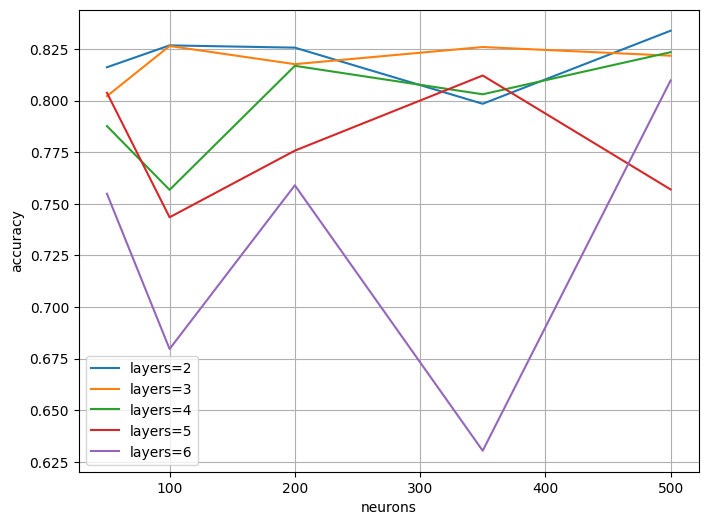

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_neurons = len(neurons)
n_layers = len(layers)

plt.figure(figsize=(8, 6))

x = neurons
for i in range(0, n_layers):
    y = accurs[i*n_layers:(i+1)*n_layers]
    plt.plot(x, y, label=f'layers={layers[i]}')
plt.xlabel('neurons')
plt.ylabel('accuracy')

plt.legend()
plt.grid(True)
plt.show()

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

In [ ]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 350),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(350),
            nn.Linear(350, num_classes),
            nn.ReLU()
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [ ]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 350]         274,750
              ReLU-3                  [-1, 350]               0
           Dropout-4                  [-1, 350]               0
       BatchNorm1d-5                  [-1, 350]             700
            Linear-6                   [-1, 10]           3,510
              ReLU-7                   [-1, 10]               0
Total params: 278,960
Trainable params: 278,960
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.06
Estimated Total Size (MB): 1.08
----------------------------------------------------------------


In [ ]:
model = FixedNeuralNetwork().to(device)
opt = torch.optim.SGD(model.parameters(), lr=1e-1, weight_decay=1e-5)
loss_func = nn.CrossEntropyLoss()

In [ ]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader
num_val_samples = 10000
num_train_samples = len(train_loader.dataset) - num_val_samples
val_dataset, new_train_dataset = random_split(train_loader.dataset, [num_val_samples, num_train_samples])
new_train_loader = DataLoader(new_train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

In [ ]:
def calculate_validation_loss(model, validation_dataloader, criterion):
    model.eval()

    total_loss = 0.0
    num_samples = 0

    with torch.no_grad():
        for inputs, labels in validation_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            num_samples += 1

    average_loss = total_loss / num_samples

    model.train()

    return average_loss

In [ ]:
class FixedNeuralNetworkTmp(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 500),
            nn.BatchNorm1d(500),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(500, 250),
            nn.BatchNorm1d(250),
            nn.GLU(),
            nn.Dropout(0.05),
            nn.Linear(125, 2*num_classes),
            nn.GLU()
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [ ]:
from torch.optim import lr_scheduler

def train(net, trainloader, val_loader, criterion, optimizer, epochs=5, device='cpu', patience=4, printing=True):
    data_len = len(trainloader)
    p_len = data_len // 5
    if (p_len == 0):
        p_len = 1
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=patience, factor=0.1)
    for epoch in (range(epochs)):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            if (printing):
                running_loss += loss.item()
                if i % p_len == p_len - 1:
                    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / p_len:.3f}')
                    running_loss = 0.0
        validation_loss = calculate_validation_loss(model, val_loader, criterion)
        print(f'validation_loss = {validation_loss}')
        scheduler.step(validation_loss)

    print('Finished Training')
def test(net, test_loader, device='cpu', printing=True):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            # calculate outputs by running images through the network
            outputs = net(inputs)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accur = correct / total
    if (printing):
        print(f'Accuracy of the network: {100 * correct / total} %')
    return accur

In [ ]:
for img, label in new_train_loader:
    img, label = img.to(device), label.to(device)
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break
for img, label in val_loader:
    img, label = img.to(device), label.to(device)
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128
torch.Size([128, 1, 28, 28])
torch.Size([128])
128


In [ ]:
model = FixedNeuralNetworkTmp().to(device)
opt = optim.SGD(model.parameters(), lr=1, momentum=0.9, nesterov=True)
loss_func = nn.CrossEntropyLoss()
train(model, new_train_loader, val_loader, loss_func, opt, 15, device, patience=4)

[1,    78] loss: 0.817
[1,   156] loss: 0.495
[1,   234] loss: 0.452
[1,   312] loss: 0.435
[1,   390] loss: 0.405
validation_loss = 0.3966573174995712
[2,    78] loss: 0.372
[2,   156] loss: 0.386
[2,   234] loss: 0.370
[2,   312] loss: 0.370
[2,   390] loss: 0.354
validation_loss = 0.35283039095281044
[3,    78] loss: 0.344
[3,   156] loss: 0.321
[3,   234] loss: 0.325
[3,   312] loss: 0.323
[3,   390] loss: 0.324
validation_loss = 0.35936396163475665
[4,    78] loss: 0.307
[4,   156] loss: 0.304
[4,   234] loss: 0.294
[4,   312] loss: 0.298
[4,   390] loss: 0.299
validation_loss = 0.3619326530378076
[5,    78] loss: 0.279
[5,   156] loss: 0.288
[5,   234] loss: 0.276
[5,   312] loss: 0.281
[5,   390] loss: 0.273
validation_loss = 0.3307560540830033
[6,    78] loss: 0.262
[6,   156] loss: 0.258
[6,   234] loss: 0.266
[6,   312] loss: 0.251
[6,   390] loss: 0.260
validation_loss = 0.30796268318272846
[7,    78] loss: 0.246
[7,   156] loss: 0.241
[7,   234] loss: 0.245
[7,   312] loss:

In [ ]:
test(model, test_loader, device, printing=True)

Accuracy of the network: 89.51 %


0.8951

На двух слоях $accuracy \approx  88.5\%$, но на трех на $\sim0.5\%$ больше. Уменьшение lr в процессе обучения дал незначительную прибавку в $\sim 0.5\%$.

### Conclusions:
После всех "экспериментов" я думаю, что вариант с двумя слоями и постоянным lr будет наилучшим выбором, потому что прибавку, которую они дают является несущественной. И вообще не стоит переусложнять модель (особенно когда можно сделать проще), ведь переобучить ее становится легче.